# _automaton_.eval(_w_)

Evaluates the weight of the given word through the automata.

Preconditions:
- `w` must be a valid word in the labelset.
- `automaton` must not have spontaneous cycles.


## Examples

In [1]:
import vcsn

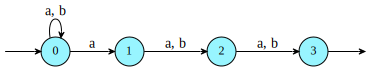

In [2]:
a = vcsn.context('lal(ab), b').de_bruijn(2)
a

In [3]:
a.eval('b')

0

In [4]:
a.eval('bbabb')

1

You can also write `automaton('word')` to evaluate a word:

In [5]:
a('bbabb')

1

In [6]:
a = vcsn.Z.expression('(<2>C+c)los(<3>e(s+<4>d)+ing)').standard()
a.shortest(10)

<24>Closed + <6>Closes + <12>closed + <3>closes + <2>Closing + closing

In [7]:
a.eval('Closing')

2

In [8]:
a.eval('close') # but not enough

0

All automaton types are supported, eval is not limited to free labelsets. For instance, with word-labeled automata:

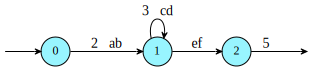

In [9]:
a = vcsn.context('law,q').expression('<2>(ab(<3>cd)*(ef))<5>', "associative").automaton()
a

In [10]:
a.eval('abcdef')

30

In [11]:
a.eval('abcdcdef')

90

Spontaneous transitions are allowed:

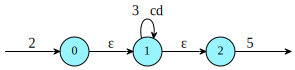

In [12]:
%%automaton -s a
context = "wordset<char_letters(abcdef)>, q"
$ -> 0 <2>
0 -> 1 \e
1 -> 1 <3>cd
1 -> 2 \e
2 -> $ <5>

In [13]:
a.eval("cd")

30

In [14]:
a.eval("")

10

Tuplesets are fully supported:

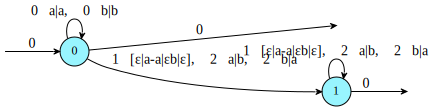

In [15]:
ctx = vcsn.context('lat<lan, lan>, zmin')
a = ctx.expression('(<0>(a|a+b|b))* (<1>[^]|\e + <1>\e|[^] + <2>(a|[^a]+b|[^b])){*}').automaton()
a #Compute the LCS distance between two words

In [16]:
a.eval("aaa|ab")

3

In [17]:
a.eval("aba|ab")

1